# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

# Assignment 5

Importing Necessary Libraries

In [33]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

Data Preprocessing

In [42]:
# Load the data from the CSV file
df = pd.read_csv('dataset.csv')

print(df.describe())

# Encode categorical features
df = pd.get_dummies(df)

# Handle missing values
df = df.fillna(df.mean())

# Extract useful features using SelectKBest
y = df['age']
X = df.drop('age', axis=1)
X_new = SelectKBest(score_func = chi2, k=2).fit_transform(X, y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

               age          bmi     children       charges   sex_female  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.494768   
std      14.049960     6.098187     1.205493  12110.011237     0.500160   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     0.000000   
75%      51.000000    34.693750     2.000000  16639.912515     1.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

          sex_male    smoker_no   smoker_yes  region_northeast  \
count  1338.000000  1338.000000  1338.000000       1338.000000   
mean      0.505232     0.795217     0.204783          0.242152   
std       0.500160     0.403694     0.403694          0.428546   
min       0.000000     0.000000     0.000000          0.0000

Data has no null values,and no outliers needed to drop.

Clustering for KMeans and Detection of Suitable Cluster Number

<Figure size 432x288 with 0 Axes>

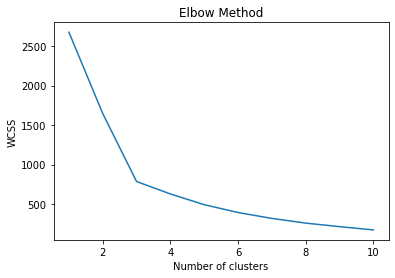

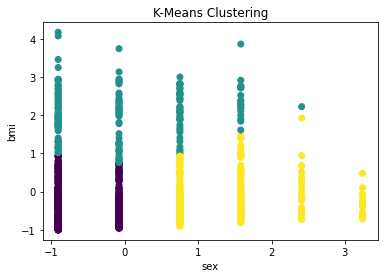

<Figure size 432x288 with 0 Axes>

In [35]:
# Apply the elbow method to determine the optimal number of clusters for K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.figure()

# Build the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters formed by the K-Means model
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('sex') #checked with get_support() method,these are the 2 features KBest has chosen
plt.ylabel('bmi')
plt.figure()

We can see that from the Elbow Curve,suitable value for n_clusters is 3.

We can see that in K-Means Clustering,there is a cluster in the lower left corner where is bmi and sex levels are low, (meaning sex tends to be male,so we have males with low bmi),it is narrowly distributed compared to others and we have a cluster in lower right corner which has low bmi and high sex levels (meaning sex tends to be female,so we have females with low bmi),this is distributed moderately compared to others.Finally we have a cluster in upper left-upper mid area which seems to contain a large range of sex and as the sex go higher ,(female) bmi range goes steadier between 2-3,and it is the widest and best distributed cluster in all 3.

Silhouette Table for KMeans

Text(0.5, 1.0, 'Silhouette Score of KMeans')

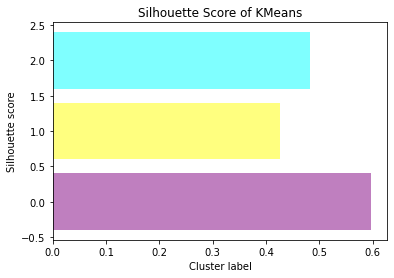

In [36]:
# Calculate the silhouette scores for the K-Means model
scores_kmeans = silhouette_samples(X_scaled, pred_kmeans)
# Create a DataFrame to store the silhouette scores and cluster labels
scorek_df = pd.DataFrame({'score': scores_kmeans, 'label': pred_kmeans})

# Group the scores by cluster label and compute summary statistics
stats_k = scorek_df.groupby('label').agg(['mean', 'std'])
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the mean and standard deviation of the silhouette scores
ax.barh(stats_k.index, stats_k['score']['mean'], align='center', alpha=0.5, ecolor='black', capsize=10,color = ['purple','yellow','cyan'])

# Add axis labels and a title
ax.set_xlabel('Cluster label')
ax.set_ylabel('Silhouette score')
ax.set_title('Silhouette Score of KMeans')

We see that purple has a lowest silhouette score,so we can say that purple has clustered closer compared to others (as can be seen in K-Means Clustering table),when cyan has the highest silhouette score,meaning it is clustered wider and more distinctive (as can be seen in K-Means Clustering table)

Clustering for Agglomerative Clustering

<Figure size 432x288 with 0 Axes>

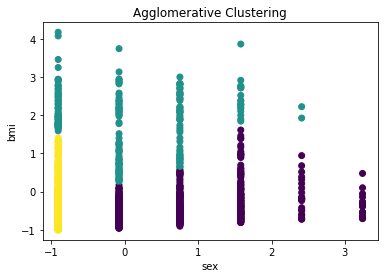

<Figure size 432x288 with 0 Axes>

In [44]:
# Build the Agglomerative Clustering model with the optimal number of clusters
agg = AgglomerativeClustering(n_clusters=3)
pred_agg = agg.fit_predict(X_scaled)

# Plot the clusters formed by the Agglomerative
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred_agg, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('sex')
plt.ylabel('bmi')
plt.figure()

We can see that in lower left corner,yellow has a small cluster,having low-moderate bmis and low sex (tends to be male),and we can see that purple and cyan has been distributed wider compared to yellow when cyan tends to have moderate-high bmi and have males more than females,purple tends to have low-moderate bmi and have females more than males.

Silhouette Table for Agglomerative Clustering

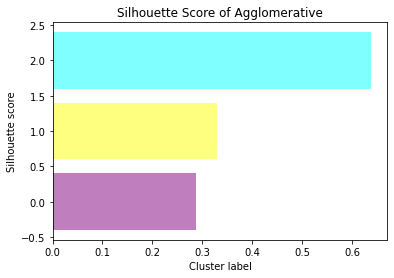

In [43]:
# Calculate the silhouette scores for the Agglomerative model
scores_agg = silhouette_samples(X_scaled, pred_agg)
# Create a DataFrame to store the silhouette scores and cluster labels
score_agg_df = pd.DataFrame({'score': scores_agg, 'label': pred_agg})

# Group the scores by cluster label and compute summary statistics
stats_agg = score_agg_df.groupby('label').agg(['mean', 'std'])
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the mean and standard deviation of the silhouette scores
ax.barh(stats_agg.index, stats_agg['score']['mean'], align='center', alpha=0.5, ecolor='black', capsize=10,color = ['purple','yellow','cyan'])

# Add axis labels and a title
ax.set_xlabel('Cluster label')
ax.set_ylabel('Silhouette score')
ax.set_title('Silhouette Score of Agglomerative')
plt.show()

We have highest silhouette score with cyan,meaning it is widely distributed and doesn't overlap.Purple has a low silhouette score even though it is widely distributed in the Agglomerative Clustering table,thats because there is more amount of data in purple cluster and despite its wideness,it still overlaps.And yellow has a moderate silhouette score and small cluster,meaning it has a lower amount of data compared to purple,maybe cyan.it overlaps less compared to purple.